In [2]:
from ztm import *
from pprint import pprint

### P8.3 [2.5 + 1.5 p]

In [3]:
stops_file = 'stops.txt'
stop_times_file = 'stop_times.txt'
trips_file = 'trips.txt'
routes_file = 'routes.txt'

In [4]:
stops_dict = parse_stops(stops_file)
trip_to_route = parse_trips(trips_file)
route_colors, route_type_map = parse_routes(routes_file)
connections, subset_stop_ids = parse_stop_times(stop_times_file, trip_to_route)

In [5]:
# Build the graph
G = build_graph(stops_dict, connections, subset_stop_ids, route_type_map)

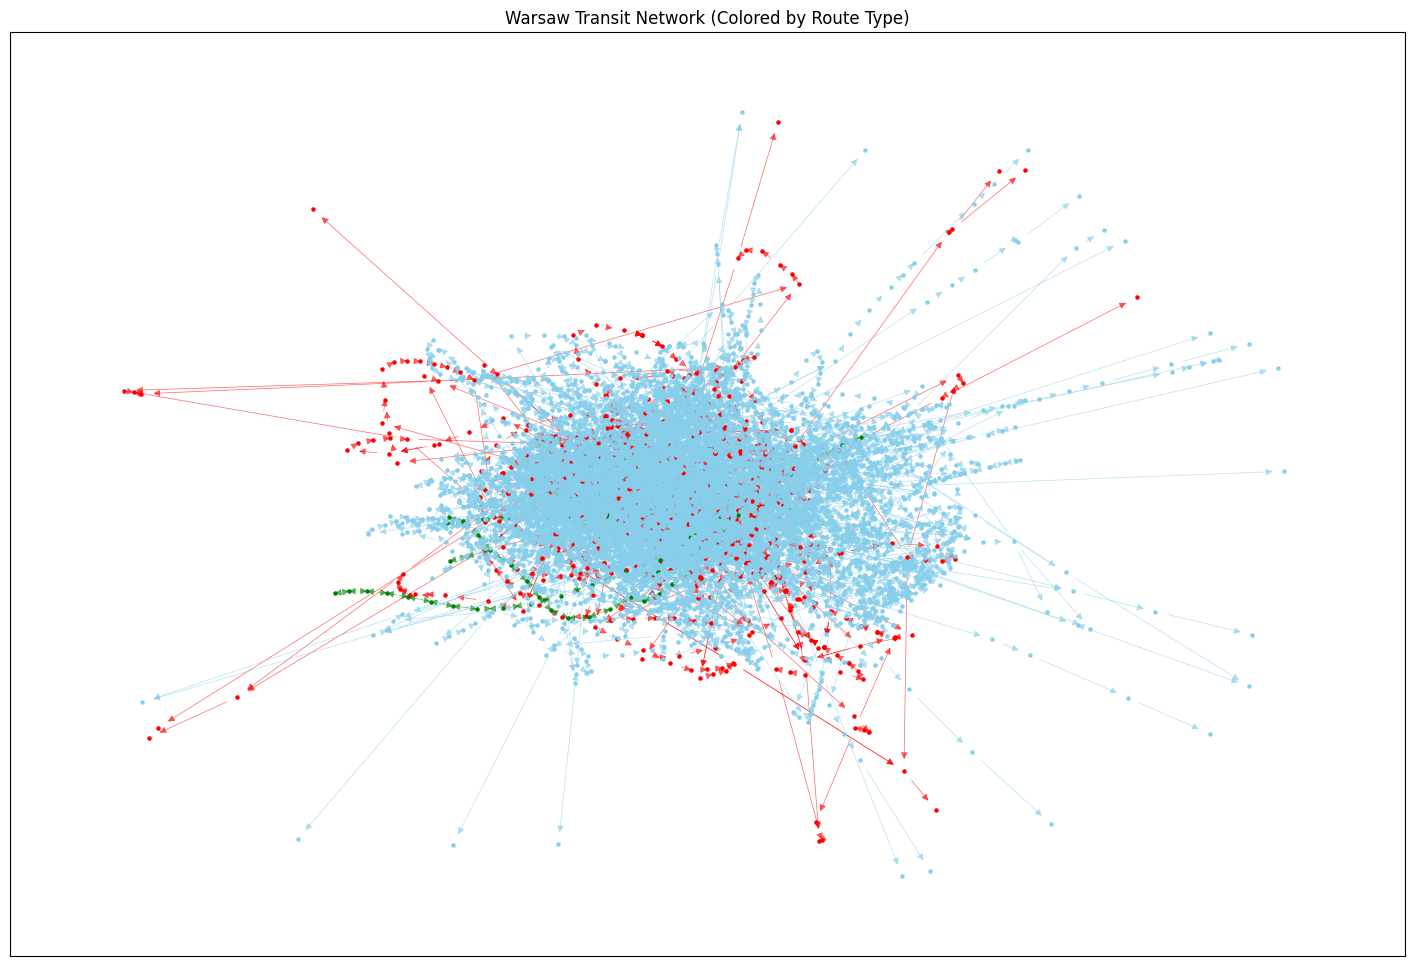

In [6]:
draw_graph(G, geographic=False)

### P8.4 (1 point)

In [7]:
tram_G = extract_subgraph_by_route_type(G, 0)
train_G = extract_subgraph_by_route_type(G, 2)
bus_G = extract_subgraph_by_route_type(G, 3)

graphs = [
    (G, 'main'),
    (tram_G, 'tram'),
    (train_G, 'train'),
    (bus_G, 'bus')
]

In [8]:
for graph, name in graphs:
    pprint(calculate_network_metrics(graph, name))

{'E': 9161,
 'N': 6912,
 "Network's Name": 'main',
 'assortativity': 0.23,
 'density': 0.0001917777683992776,
 '⟨k⟩ - average degree': 2.65}
{'E': 756,
 'N': 618,
 "Network's Name": 'tram',
 'assortativity': 0.23,
 'density': 0.0019826595962298,
 '⟨k⟩ - average degree': 2.45}
{'E': 120,
 'N': 59,
 "Network's Name": 'train',
 'assortativity': -0.18,
 'density': 0.03506721215663355,
 '⟨k⟩ - average degree': 4.07}
{'E': 8285,
 'N': 6249,
 "Network's Name": 'bus',
 'assortativity': 0.23,
 'density': 0.00021219784410063868,
 '⟨k⟩ - average degree': 2.65}


### P8.5 (2 points)

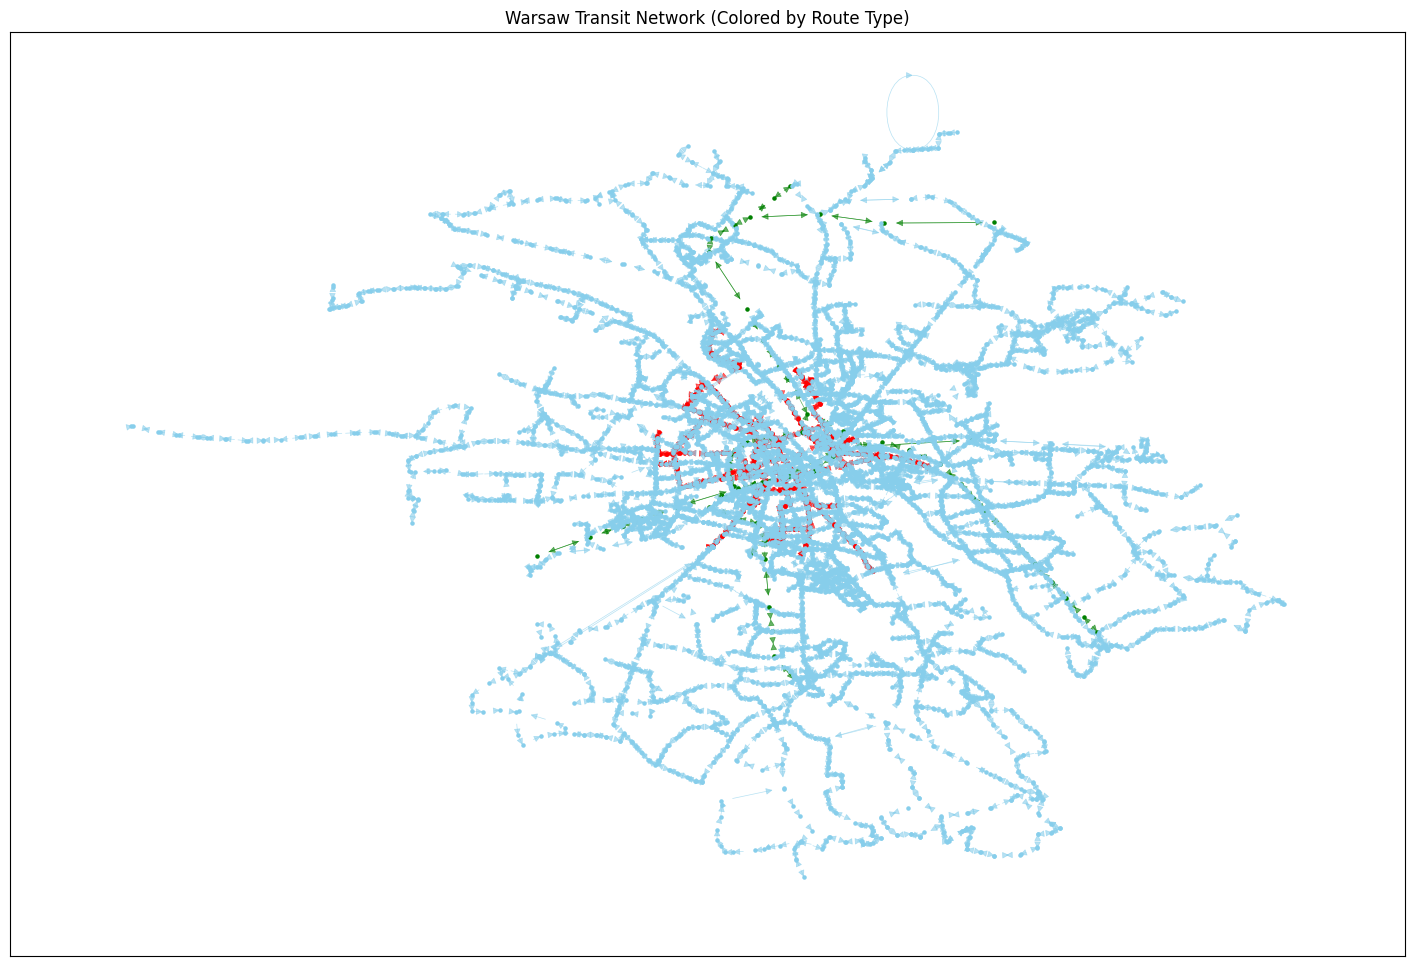

In [9]:
draw_graph(G, geographic=True)

### P8.6 (1 point)

In [ ]:
from datetime import datetime

def parse_stop_times(file_path, trip_service_map, start_time="07:00:00", end_time="09:00:00"):
    stop_times_df = pd.read_csv(file_path)

    stop_times_df['departure_time'] = stop_times_df['departure_time'].apply(normalize_times)
    stop_times_df['departure_time'] = pd.to_datetime(stop_times_df['departure_time'], format="%H:%M:%S").dt.time

    start_time_obj = datetime.strptime(start_time, "%H:%M:%S").time()
    end_time_obj = datetime.strptime(end_time, "%H:%M:%S").time()

    valid_trips = stop_times_df.groupby('trip_id').filter(
        lambda x: any(start_time_obj <= time <= end_time_obj for time in x['departure_time'])
    )['trip_id'].unique()

    subset_df = stop_times_df[stop_times_df['trip_id'].isin(valid_trips)]

    subset_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)
    grouped = subset_df.groupby('trip_id')

    connections = []
    subset_stop_ids = set()
    for trip_id, group in grouped:
        stops = group['stop_id'].tolist()
        subset_stop_ids.update(stops)
        route_id = trip_service_map.get(trip_id)
        # Create edges with route_id
        connections.extend([(stops[i], stops[i + 1], route_id) for i in range(len(stops) - 1)])

    return connections, subset_stop_ids


In [11]:
def generate_subgraph(start_time, end_time):
    connections, subset_stop_ids = parse_stop_times(stop_times_file, trip_to_route, start_time, end_time)
    G = build_graph(stops_dict, connections, subset_stop_ids, route_type_map)
    
    return G

In [12]:
morning_G = generate_subgraph("07:00:00", "09:00:00")

/tmp/ipykernel_1228/3280850879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)


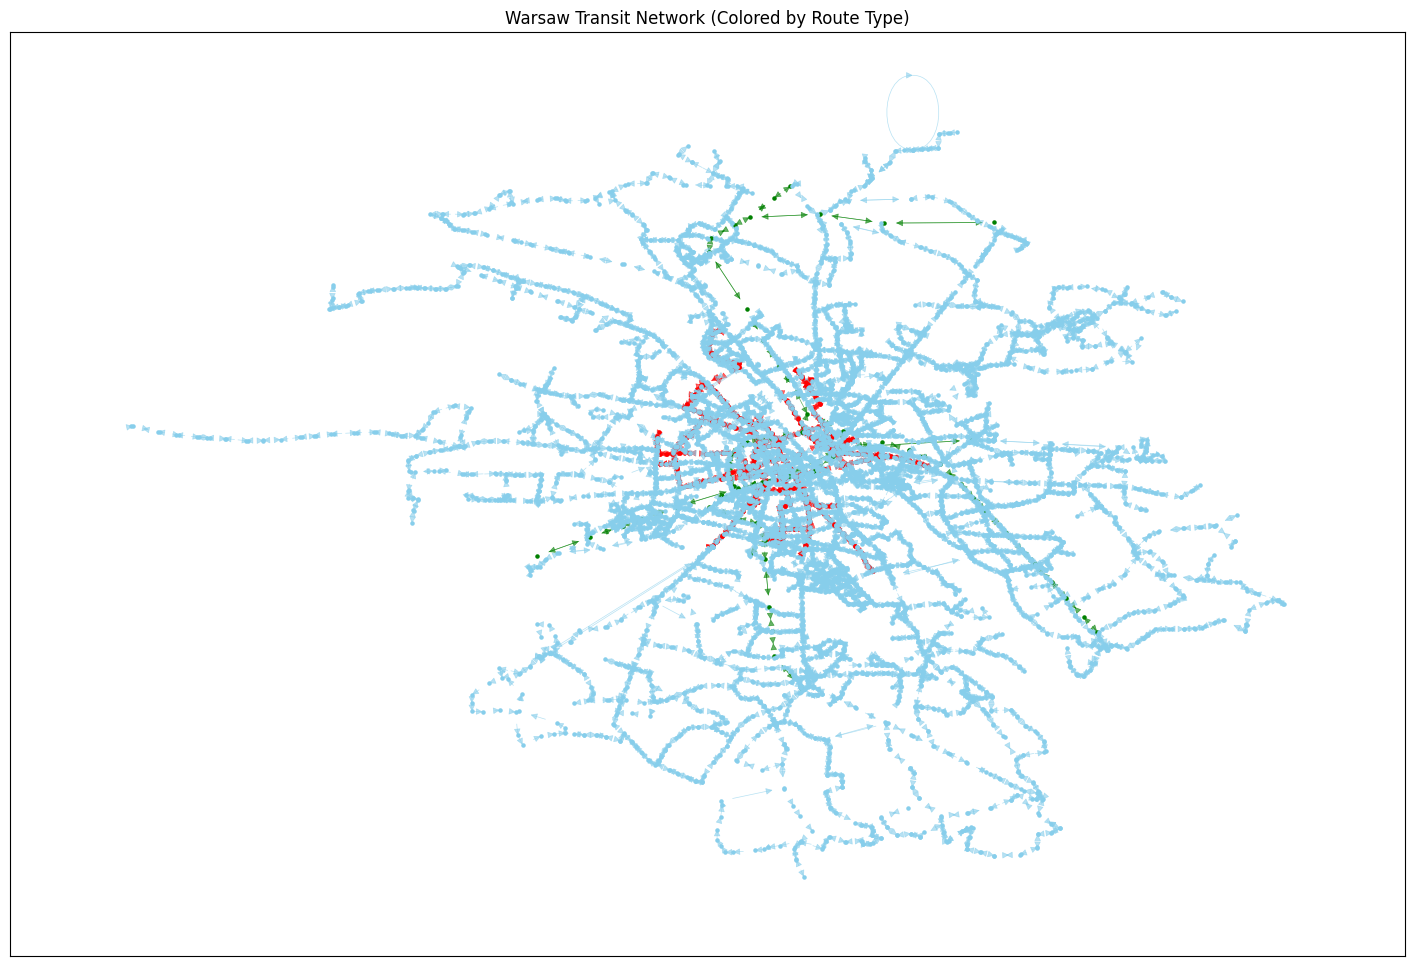

In [13]:
draw_graph(G, True)

## P8.8 (1 point)

In [14]:
calculate_network_metrics(G, 'Morning graph')

{"Network's Name": 'Morning graph',
 'N': 6912,
 'E': 9161,
 '⟨k⟩ - average degree': 2.65,
 'assortativity': 0.23,
 'density': 0.0001917777683992776}

In [15]:
afternoon_graph = generate_subgraph("11:00:00", "13:00:00")

calculate_network_metrics(afternoon_graph, 'Afternoon graph')


/tmp/ipykernel_1228/3280850879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)


{"Network's Name": 'Afternoon graph',
 'N': 6686,
 'E': 8402,
 '⟨k⟩ - average degree': 2.51,
 'assortativity': 0.17,
 'density': 0.00018798140590492508}

In [16]:
evening_graph = generate_subgraph("01:00:00", "03:00:00")

calculate_network_metrics(evening_graph, 'Night graph')


/tmp/ipykernel_1228/3280850879.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.sort_values(by=['trip_id', 'stop_sequence'], inplace=True)


{"Network's Name": 'Night graph',
 'N': 2244,
 'E': 2459,
 '⟨k⟩ - average degree': 2.19,
 'assortativity': 0.24,
 'density': 0.0004885470582672335}

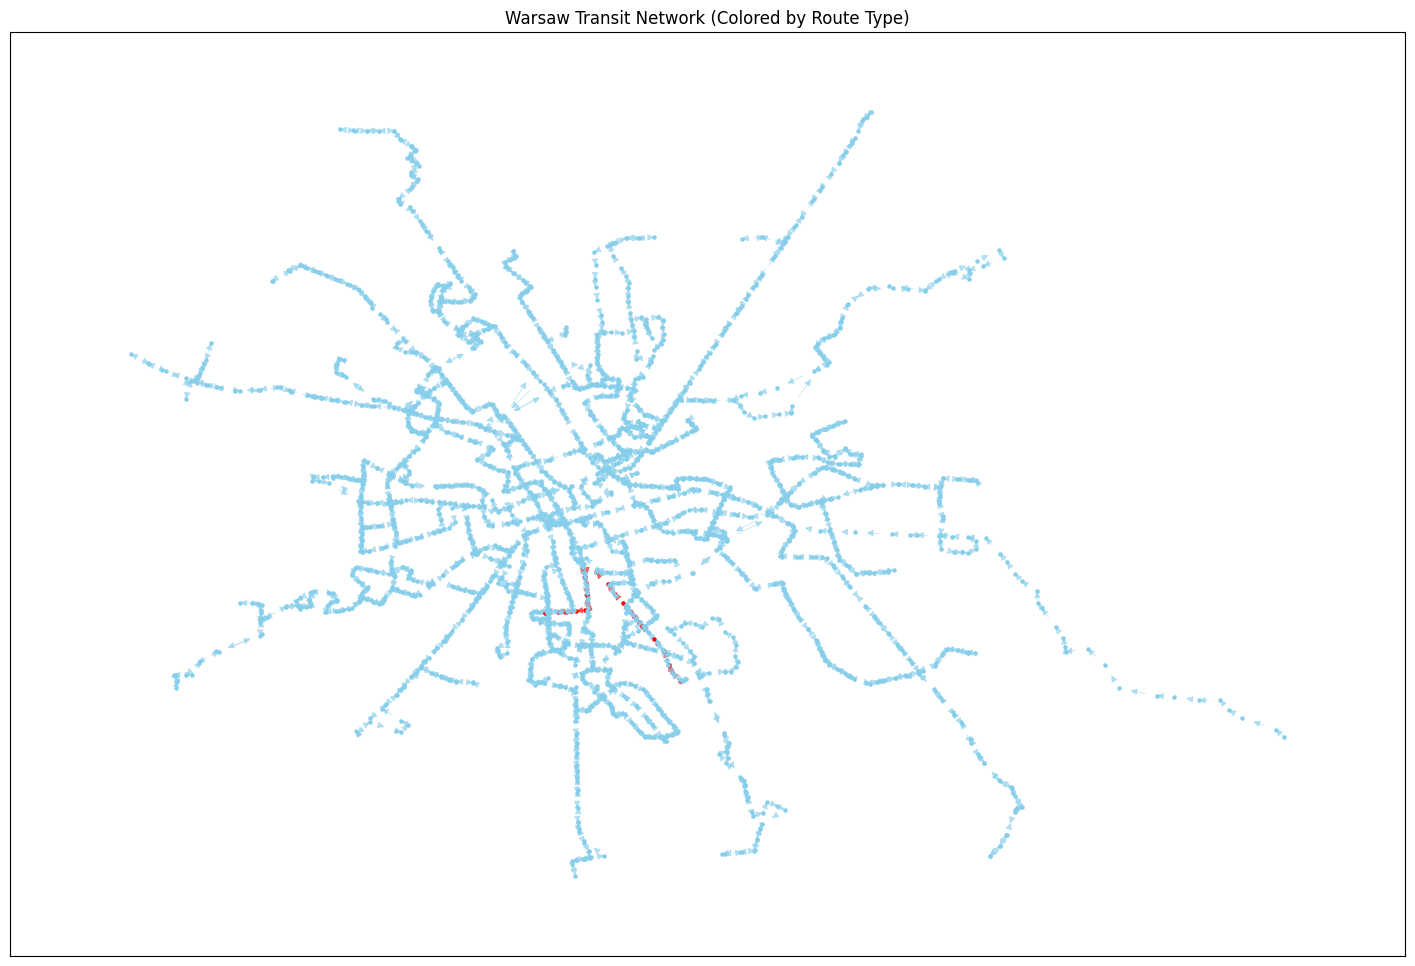

In [17]:
draw_graph(evening_graph, True)

### P8.9 (2.5 points)

In [29]:
import pandas as pd

def parse_stops_names(file_path):
    stops_df = pd.read_csv(file_path)
    stops_dict = {
        row['stop_id']: row['stop_name']
        for _, row in stops_df.iterrows()
    }
    return stops_dict

stops_dict = parse_stops_names("stops.txt")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx


def analyze_centrality(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, normalized=True)
    closeness_centrality = nx.closeness_centrality(G)

    centrality_df = pd.DataFrame({
        'stop_id': list(G.nodes),
        'degree_centrality': [degree_centrality[node] for node in G.nodes],
        'betweenness_centrality': [betweenness_centrality[node] for node in G.nodes],
        'closeness_centrality': [closeness_centrality[node] for node in G.nodes]
    })
    return centrality_df


def plot_centrality_with_names(centrality_df, stops_dict):
    centrality_df['stop_name'] = centrality_df['stop_id'].map(stops_dict)

    sns.set(style="whitegrid")
    plt.figure(figsize=(14, 8))

    # Degree Centrality Plot
    plt.subplot(3, 1, 1)
    sns.barplot(
        y='degree_centrality', x='stop_name', data=centrality_df.nlargest(10, 'degree_centrality'),
        palette="viridis"
    )
    plt.title('Top 10 Stops by Degree Centrality')
    plt.ylabel('Degree Centrality')
    plt.xlabel('Stop Name')

    # Betweenness Centrality Plot
    plt.subplot(3, 1, 2)
    sns.barplot(
        y='betweenness_centrality', x='stop_name', data=centrality_df.nlargest(10, 'betweenness_centrality'),
        palette="magma"
    )
    plt.title('Top 10 Stops by Betweenness Centrality')
    plt.ylabel('Betweenness Centrality')
    plt.xlabel('Stop Name')

    # Closeness Centrality Plot
    plt.subplot(3, 1, 3)
    sns.barplot(
        y='closeness_centrality', x='stop_name', data=centrality_df.nlargest(10, 'closeness_centrality'),
        palette="plasma"
    )
    plt.title('Top 10 Stops by Closeness Centrality')
    plt.ylabel('Closeness Centrality')
    plt.xlabel('Stop Name')

    plt.tight_layout()
    plt.show()




Analyze centrality....
Plot centrality....


/tmp/ipykernel_1228/2832016382.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1228/2832016382.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_1228/2832016382.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


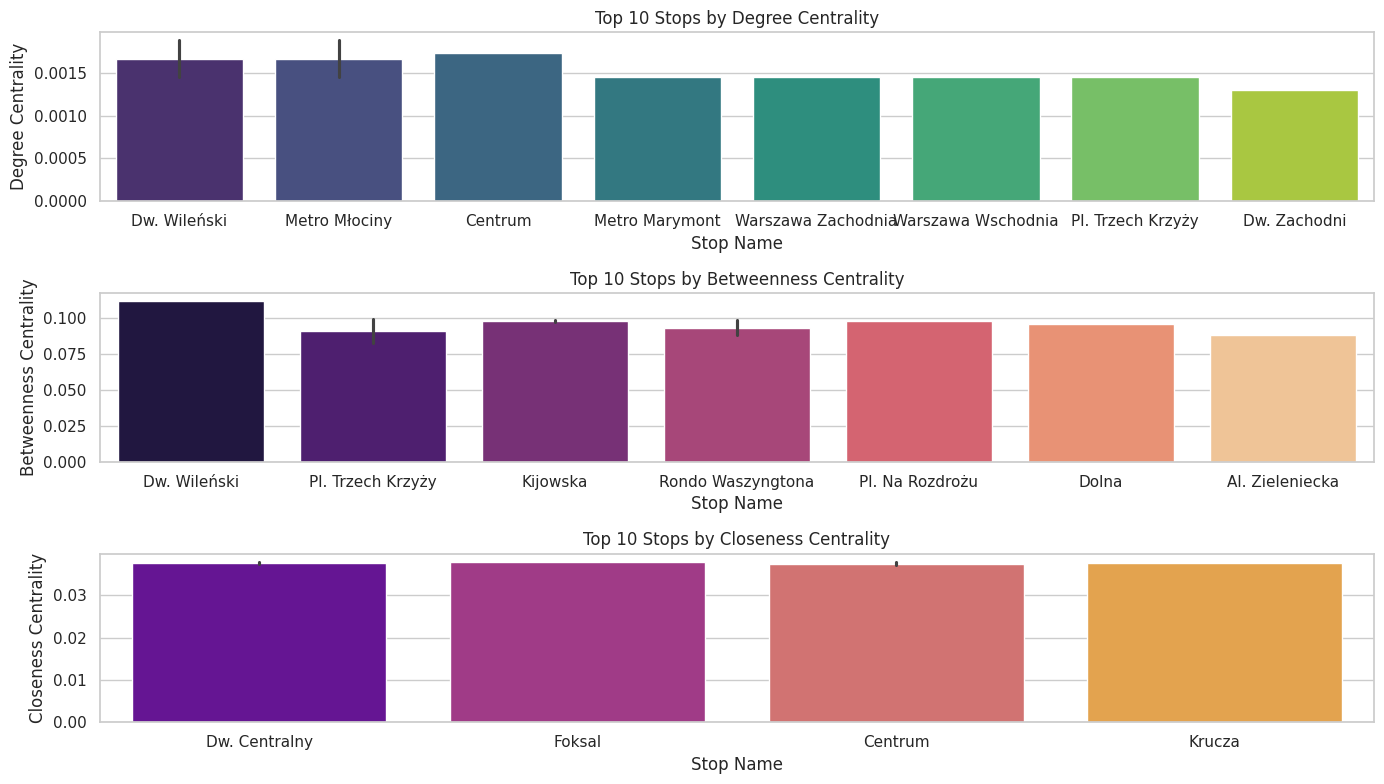

In [36]:
print("Analyze centrality....")
centrality_df = analyze_centrality(G)

print("Plot centrality....")
plot_centrality_with_names(centrality_df, stops_dict)


In [ ]:
def find_most_important_stop(centrality_df, stops_dict):
    centrality_df['centrality_score'] = (
        centrality_df['degree_centrality'] +
        centrality_df['betweenness_centrality'] +
        centrality_df['closeness_centrality']
    )

    most_important_stop = centrality_df.loc[centrality_df['centrality_score'].idxmax()]
    
    return  most_important_stop

most_important_stop = find_most_important_stop(centrality_df, stops_dict)

print("Most Important Stop in the Network:")
pprint(most_important_stop)

Most Important Stop in the Network:
stop_id                           1858
degree_centrality             0.001881
betweenness_centrality        0.111677
closeness_centrality           0.03579
stop_name                 Dw. Wileński
centrality_score              0.149348
Name: 1615, dtype: object


#### Explanation of Results:
**Degree Centrality**: Identifies stops that are directly connected to many others. High degree centrality suggests hubs with frequent connections.

**Betweenness Centrality**: Highlights stops that frequently lie on the shortest paths between other stops. These are key for transferring passengers.

**Closeness Centrality**: Measures how close a stop is to all other stops. Stops with high closeness centrality are strategically placed to minimize travel time across the network.

**Combined Score**: Aggregates the metrics to rank the overall importance of stops.